<a href="https://colab.research.google.com/github/AkarshaJain/DataAnalysisPortfolios/blob/main/CaliforniaHousingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akarsha","key":"84c7cfsdfferfrferbgtgrtg096955e5f"}'}

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Jun  9 23:02 kaggle.json


In [4]:
!pip install -q kaggle

In [5]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets list

ref                                                               title                                                      size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  --------------------------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
rakeshkapilavai/extrovert-vs-introvert-behavior-data              Extrovert vs. Introvert Behavior Data                     15392  2025-05-21 04:26:52.443000          12115        285  1.0              
bismasajjad/global-ai-job-market-and-salary-trends-2025           Global AI Job Market & Salary Trends 2025                529004  2025-06-01 07:20:49.537000           3700         59  0.9411765        
adilshamim8/social-media-addiction-vs-relationships               Students' Social Media Addiction                           7851  2025-05-10 14:38:02.713000          14119        206  1.0

In [23]:
!kaggle datasets download -d camnugent/california-housing-prices

Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
california-housing-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
housing = pd.read_csv("sample_data/california_housing_train.csv")

In [25]:
housing.shape

(17000, 9)

In [26]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [27]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [28]:
housing["median_house_value"].value_counts()
#this will give you the distibution of categories in this variable

,count
median_house_value,
500001.0,814
137500.0,95
162500.0,89
112500.0,85
187500.0,74
...,...
442000.0,1
328400.0,1
296300.0,1


In [29]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

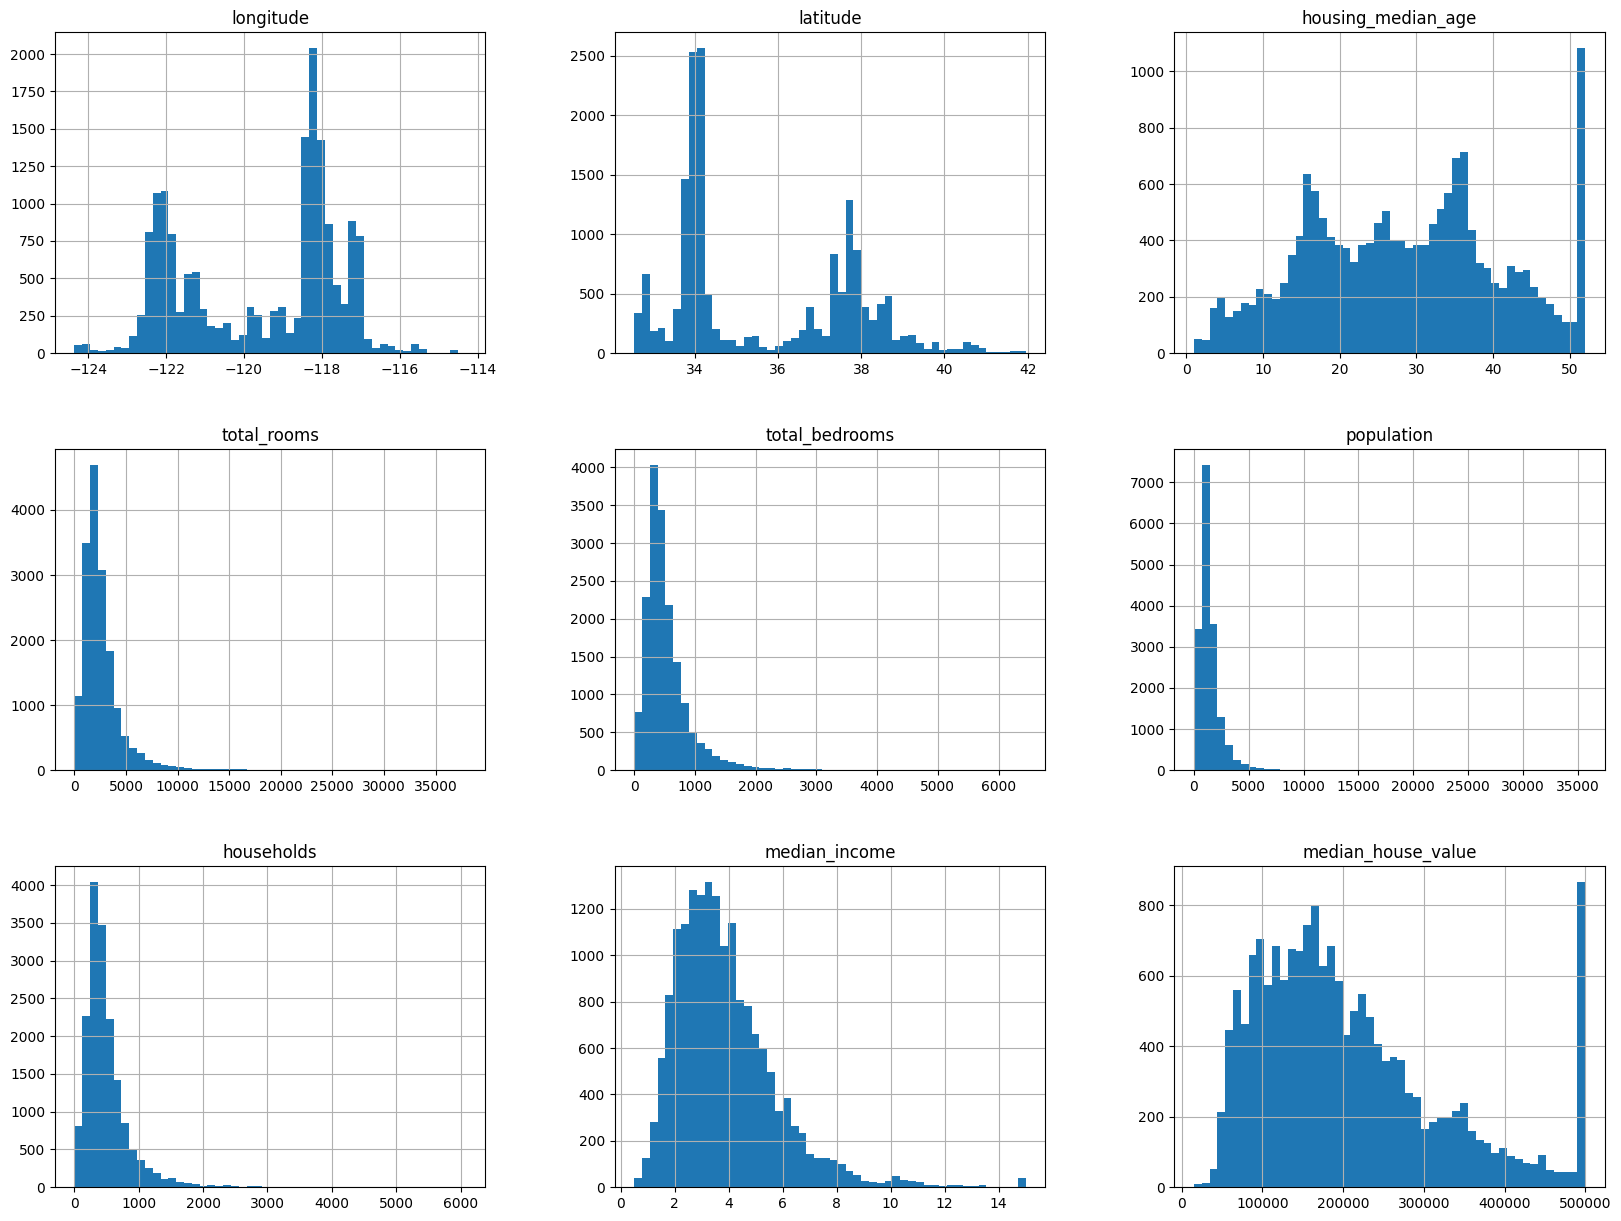

In [30]:
housing.hist(bins=50,figsize=(20,15))

<Axes: xlabel='longitude', ylabel='latitude'>

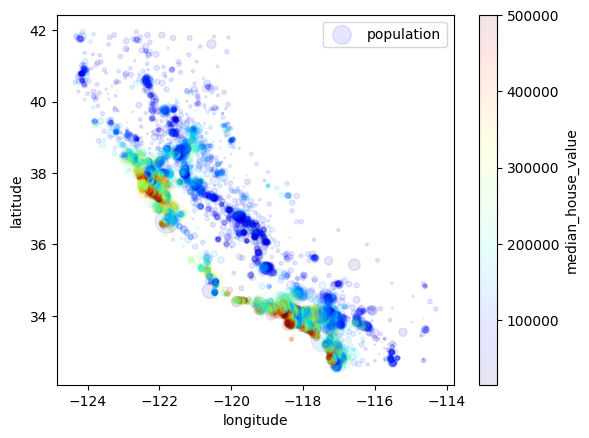

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude",
             alpha=0.1, s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"))

In [32]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


In [33]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.691871
total_rooms,0.130991
housing_median_age,0.106758
households,0.061031
total_bedrooms,0.045783
population,-0.027850
longitude,-0.044982
latitude,-0.144917


In [34]:
housing_na=housing.dropna(subset=["total_bedrooms"])
#here I am dropping th eobservations with missing values for total_bedrooms
housing_na.shape

(17000, 9)

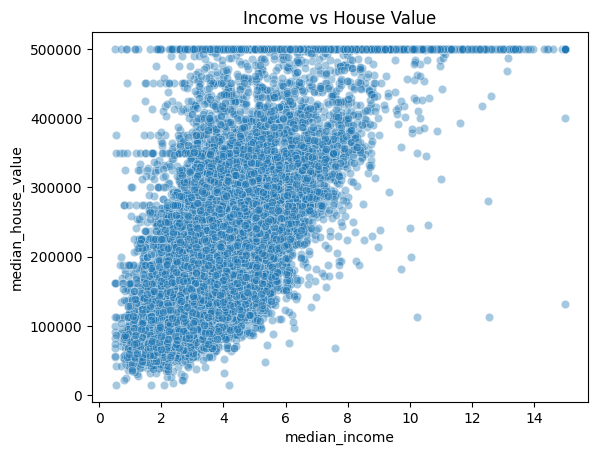

In [38]:
sns.scatterplot(x='median_income', y='median_house_value', data=housing, alpha=0.4)
plt.title("Income vs House Value")
plt.show()


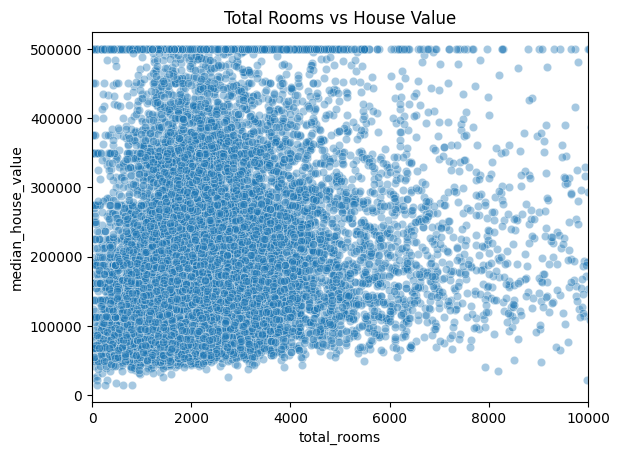

In [39]:
sns.scatterplot(x='total_rooms', y='median_house_value', data=housing, alpha=0.4)
plt.title("Total Rooms vs House Value")
plt.xlim(0, 10000)  # Optional zoom in
plt.show()


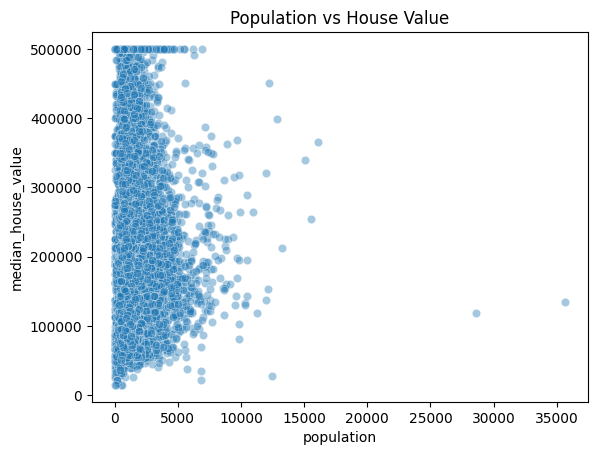

In [40]:
sns.scatterplot(x='population', y='median_house_value', data=housing, alpha=0.4)
plt.title("Population vs House Value")
plt.show()


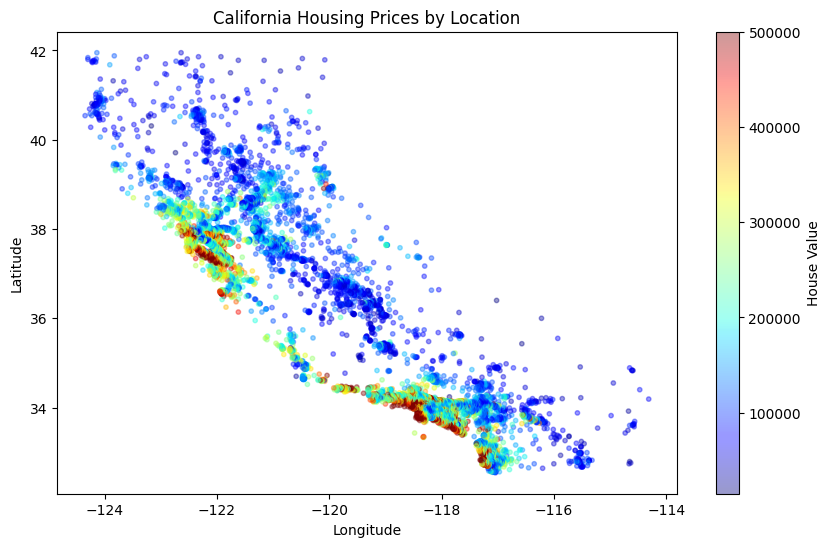

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(housing['longitude'], housing['latitude'],
            alpha=0.4, s=10,
            c=housing['median_house_value'], cmap='jet')
plt.colorbar(label="House Value")
plt.title("California Housing Prices by Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


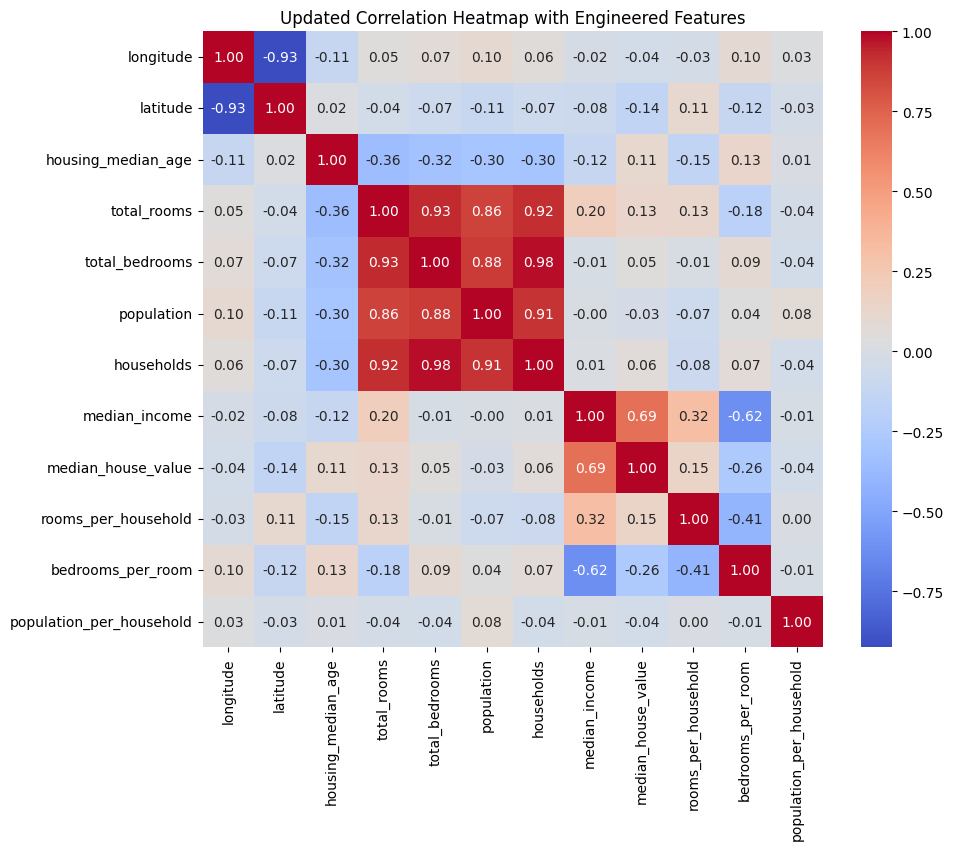

In [43]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

# Visualize new correlations
plt.figure(figsize=(10,8))
sns.heatmap(housing.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Updated Correlation Heatmap with Engineered Features")
plt.show()


<ipython-input-44-b5be5f6d420a>:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = housing.pivot_table(index='lat_bin', columns='long_bin', values='median_house_value', aggfunc='mean')


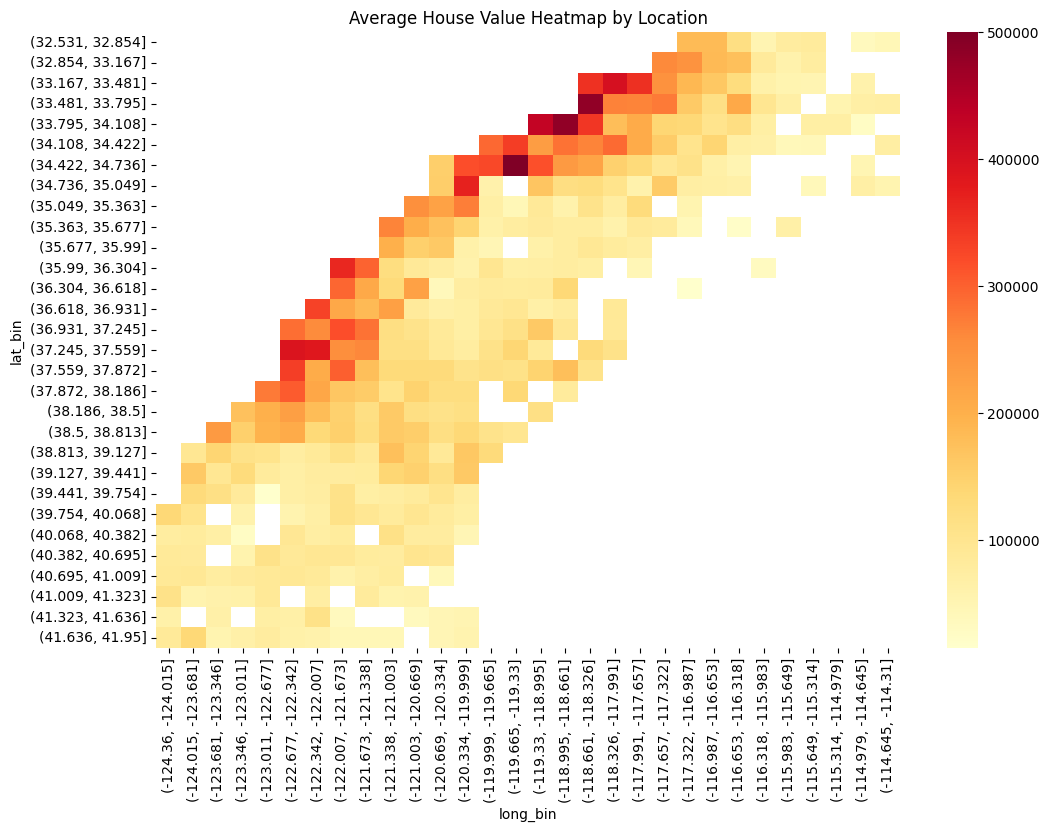

In [44]:
housing['lat_bin'] = pd.cut(housing['latitude'], bins=30)
housing['long_bin'] = pd.cut(housing['longitude'], bins=30)

pivot_table = housing.pivot_table(index='lat_bin', columns='long_bin', values='median_house_value', aggfunc='mean')

plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap='YlOrRd')
plt.title('Average House Value Heatmap by Location')
plt.show()


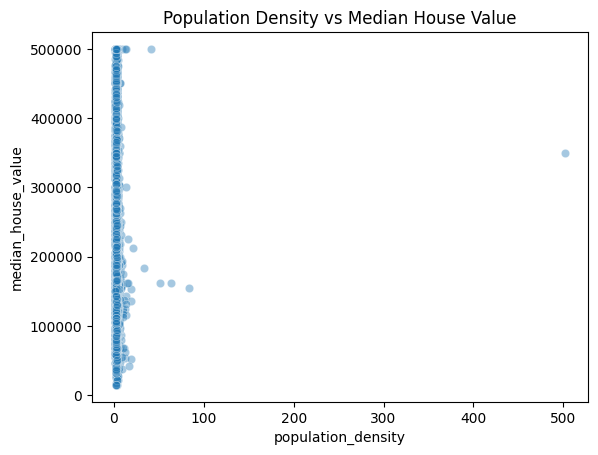

In [45]:
housing['population_density'] = housing['population'] / housing['households']

sns.scatterplot(x='population_density', y='median_house_value', data=housing, alpha=0.4)
plt.title("Population Density vs Median House Value")
plt.show()


In [47]:
# Select only numeric columns
numeric_cols = housing.select_dtypes(include=['number'])
skewness = numeric_cols.skew()
print(skewness)


longitude                    -0.304003
latitude                      0.471801
housing_median_age            0.064894
total_rooms                   4.002730
total_bedrooms                3.322637
population                    5.187212
households                    3.342668
median_income                 1.626693
median_house_value            0.973037
rooms_per_household          21.792258
bedrooms_per_room             2.235615
population_per_household    112.245328
population_density          112.245328
dtype: float64


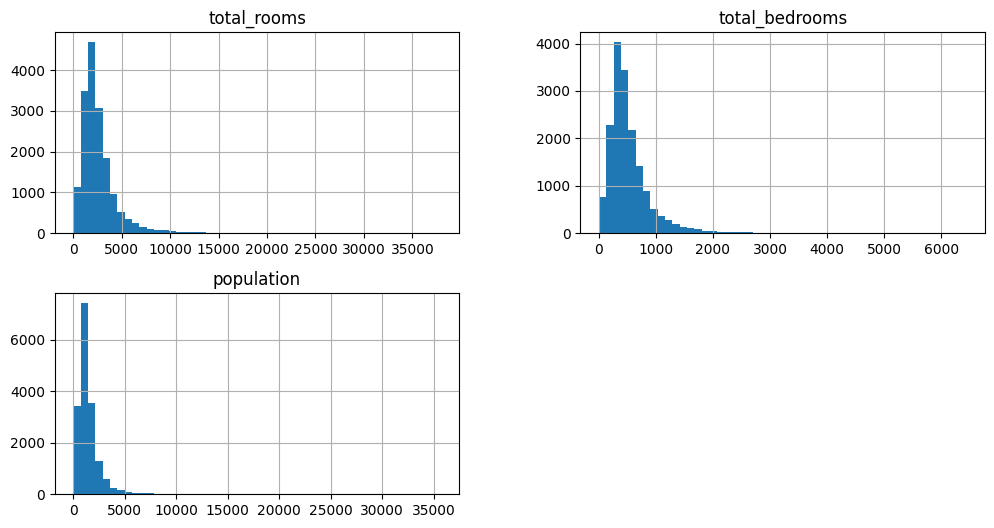

In [48]:
numeric_cols[['total_rooms', 'total_bedrooms', 'population']].hist(bins=50, figsize=(12,6))
plt.show()


In [49]:
summary = housing.describe().T
summary['range'] = summary['max'] - summary['min']
summary[['mean', '50%', 'std', 'min', 'max', 'range']]


,mean,50%,std,min,max,range
longitude,-119.562108,-118.490000,2.005166,-124.350000,-114.310000,10.040000
latitude,35.625225,34.250000,2.137340,32.540000,41.950000,9.410000
housing_median_age,28.589353,29.000000,12.586937,1.000000,52.000000,51.000000
total_rooms,2643.664412,2127.000000,2179.947071,2.000000,37937.000000,37935.000000
total_bedrooms,539.410824,434.000000,421.499452,1.000000,6445.000000,6444.000000
population,1429.573941,1167.000000,1147.852959,3.000000,35682.000000,35679.000000
households,501.221941,409.000000,384.520841,1.000000,6082.000000,6081.000000
median_income,3.883578,3.544600,1.908157,0.499900,15.000100,14.500200
median_house_value,207300.912353,180400.000000,115983.764387,14999.000000,500001.000000,485002.000000
rooms_per_household,5.439044,5.236106,2.539196,0.846154,141.909091,141.062937
